In [38]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


---
## **Loading Dataset**

In [39]:
df=pd.read_csv('D:\\Github\\PRODIGY_DS_03\\data\\bank\\bank.csv',delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


---
## **Data Understanding**

In [40]:
df.shape
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [41]:
df.select_dtypes(include='number').columns.to_list()

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [42]:
df.select_dtypes(include=['object','category']).columns.to_list()


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

---
## **Data Cleaning**

### Identifying Null Values

In [43]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Identifying Duplicate Rows

In [44]:
df.duplicated().sum()

np.int64(0)

### Identifying Unkown Values

In [45]:
df['job'].value_counts(),df['education'].value_counts(),df['contact'].value_counts()

(job
 management       969
 blue-collar      946
 technician       768
 admin.           478
 services         417
 retired          230
 self-employed    183
 entrepreneur     168
 unemployed       128
 housemaid        112
 student           84
 unknown           38
 Name: count, dtype: int64,
 education
 secondary    2306
 tertiary     1350
 primary       678
 unknown       187
 Name: count, dtype: int64,
 contact
 cellular     2896
 unknown      1324
 telephone     301
 Name: count, dtype: int64)

### Outlier Detection

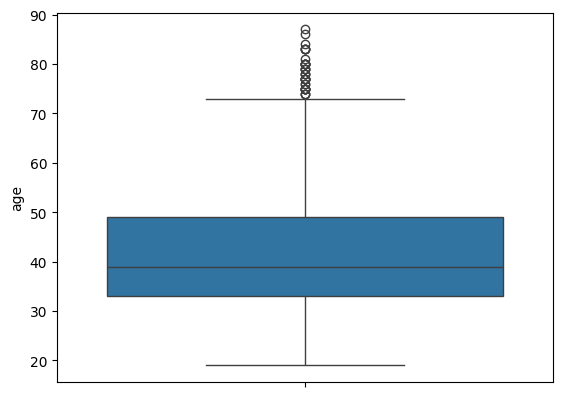

In [46]:
sns.boxplot(df['age'])
plt.show()

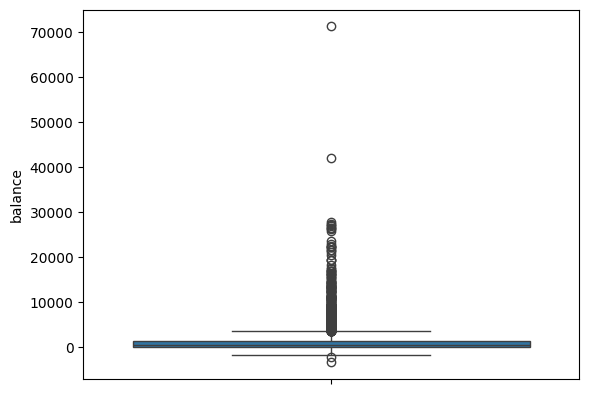

In [47]:
sns.boxplot(df['balance'])
plt.show()

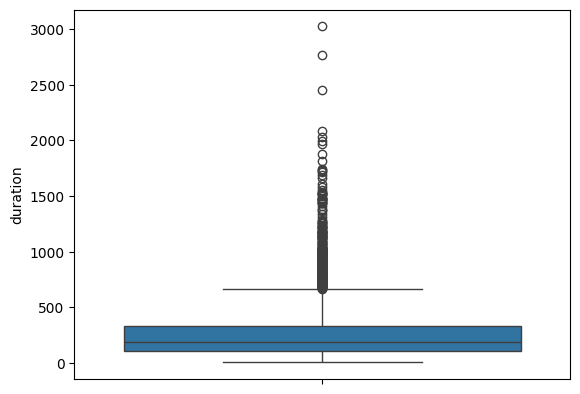

In [48]:
sns.boxplot(df['duration'])
plt.show()

In [49]:
del df['day']
del df['duration']

# Insights Deleting Weak Feautes day, month and duration

---
## **Exploratory Data Analysis**

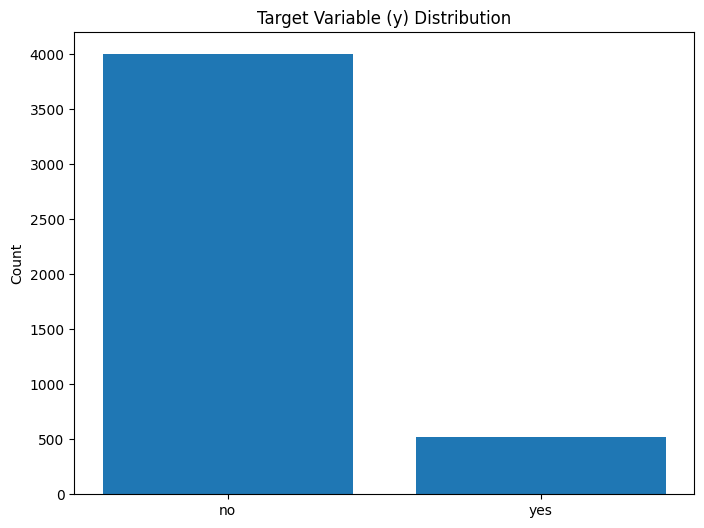

In [76]:
target_dist=df['y'].value_counts()
plt.figure(figsize=(8,6))
plt.bar(target_dist.index, target_dist.values)
plt.title('Target Variable (y) Distribution')
plt.ylabel('Count')
plt.show()

# Insight : 88% No 12% Yes

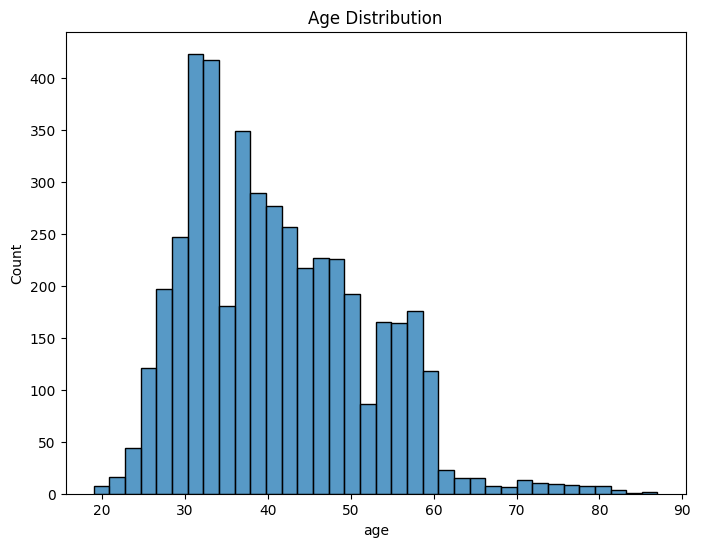

In [75]:
plt.figure(figsize=(8,6))
sns.histplot(df['age'])
plt.title('Age Distribution')
plt.show()

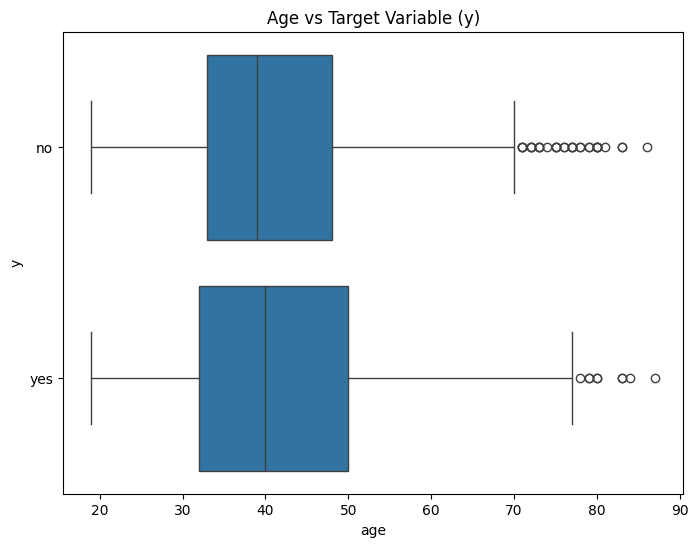

In [52]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['age'],y=df['y'])
plt.title('Age vs Target Variable (y)')
plt.show()

# Insight :  From age 30 to 50 have most subscription


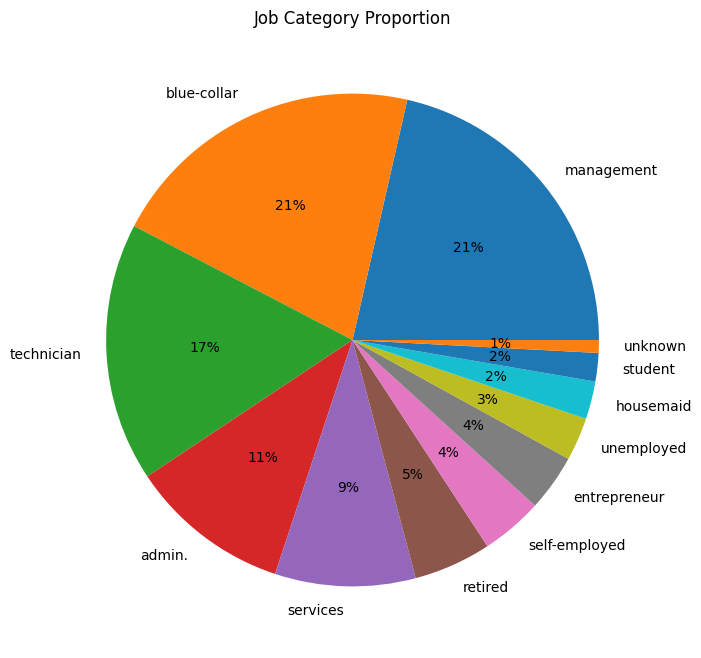

In [77]:
job_dist=df['job'].value_counts()
job_dist=job_dist.reset_index()
job_dist['percentage']=((job_dist['count'] / job_dist['count'].sum()) * 100).round(2)
plt.figure(figsize=(12,8))
plt.pie(job_dist['percentage'],labels=job_dist['job'],autopct='%1.f%%')
plt.title('Job Category Proportion')
plt.show()

# Insight : blue-collar, management and technician are top 3 dominant categories

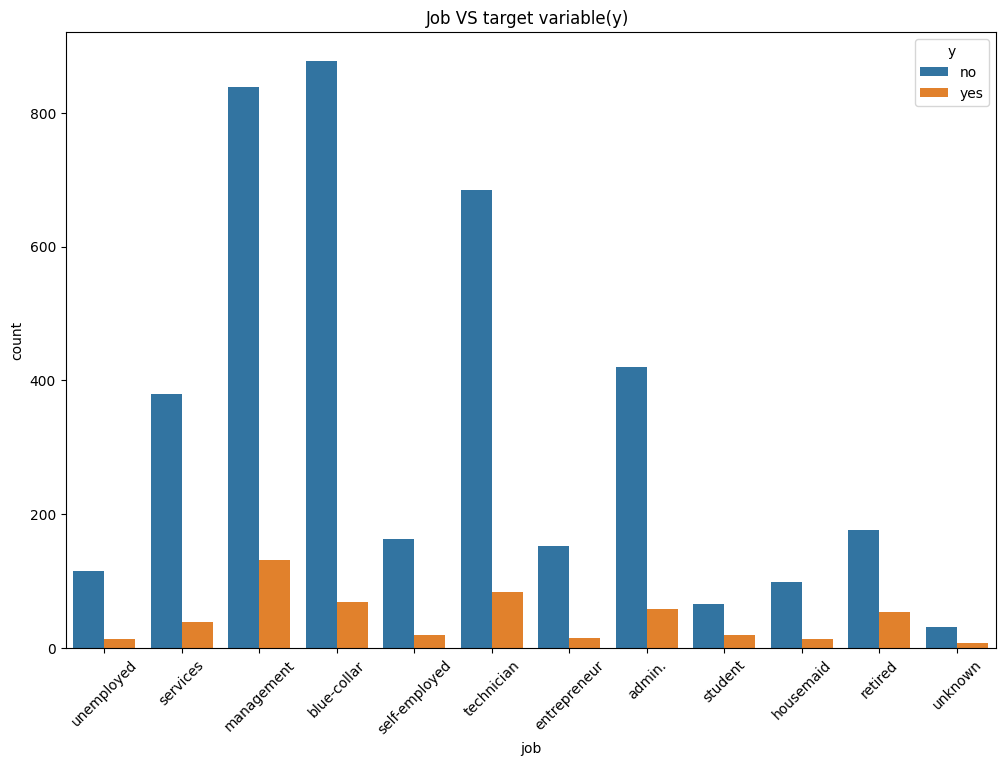

In [74]:
plt.figure(figsize=(12,8))
sns.countplot(x='job', hue='y', data=df)
plt.xticks(rotation=45)
plt.title('Job VS target variable(y) ')
plt.show()

# Insight : management, techinicain and blue-collar are top 3 most responsive 

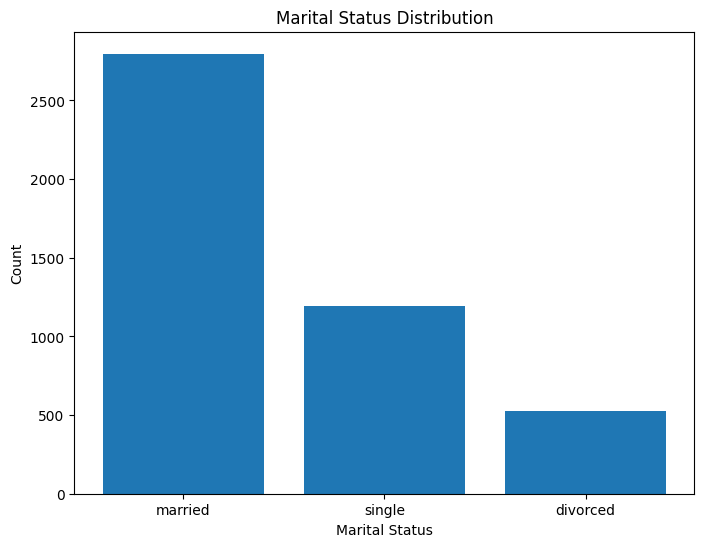

In [87]:
marital_data=df['marital'].value_counts().reset_index()
plt.figure(figsize=(8,6))
plt.bar(marital_data['marital'],marital_data['count'])
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

# Insight : 62% customers are married, 26% single and 12% divorced

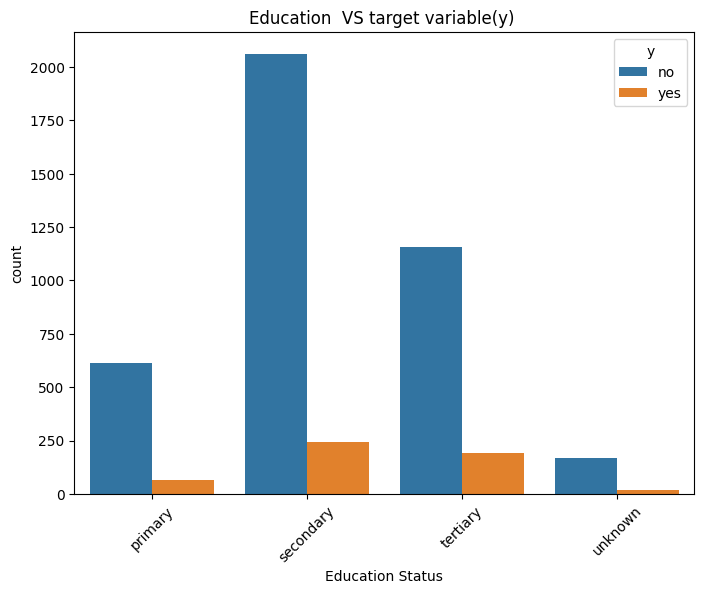

In [94]:
plt.figure(figsize=(8,6))
sns.countplot(x='education', hue='y', data=df)
plt.xticks(rotation=45)
plt.title('Education  VS target variable(y) ')
plt.xlabel('Education Status')
plt.show()

# Insight: Mostly customers are in secondary education

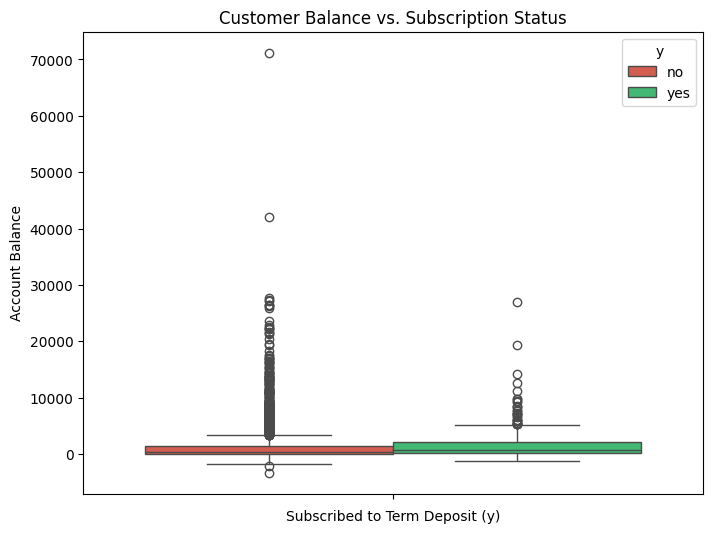

In [103]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, hue='y', y='balance', palette=['#e74c3c', '#2ecc71'])
plt.title('Customer Balance vs. Subscription Status')
plt.xlabel('Subscribed to Term Deposit (y)')
plt.ylabel('Account Balance')
plt.show()

# Insight : Customers who subscribe to term deposits typically hold a slightly higher median account balance, even though the non-subscribing group contains the most extreme high-balance outliers.

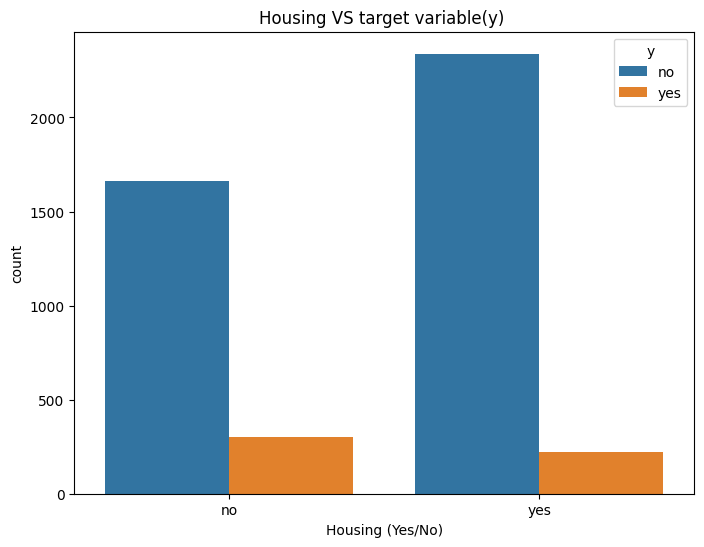

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='housing', hue='y', data=df)
plt.title('Housing VS target variable(y) ')
plt.xlabel('Housing (Yes/No)')
plt.show()

# Insights : Customers without an existing housing loan are noticeably more likely to subscribe to a term deposit than those who are already paying one off.

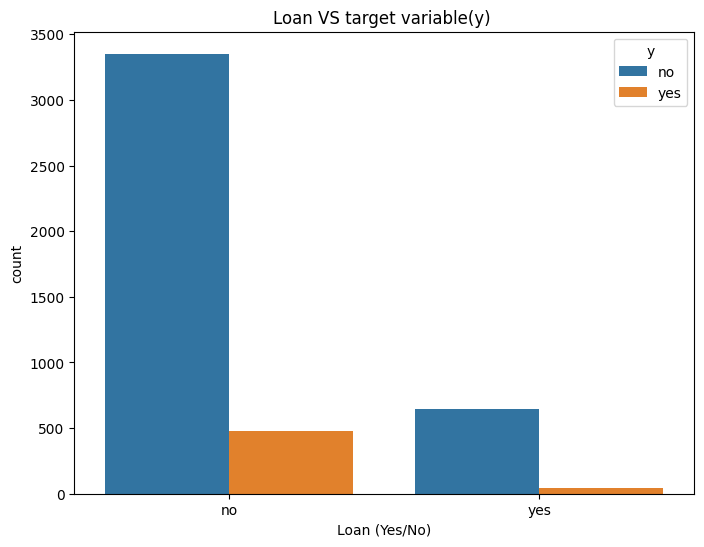

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='loan', hue='y', data=df)
plt.title('Loan VS target variable(y) ')
plt.xlabel('Loan (Yes/No)')
plt.show()

# Insights : The vast majority of successful subscriptions come from customers without a personal loan, indicating that debt-free individuals are your best targets.


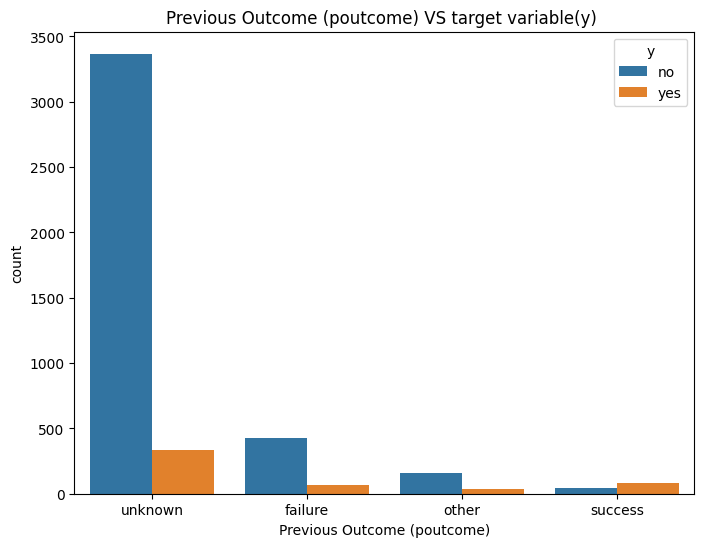

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='poutcome', hue='y', data=df)
plt.title('Previous Outcome (poutcome) VS target variable(y) ')
plt.xlabel('Previous Outcome (poutcome)')
plt.show()

# Insight : Unknown category dominates in Previous outcome (poutcome)

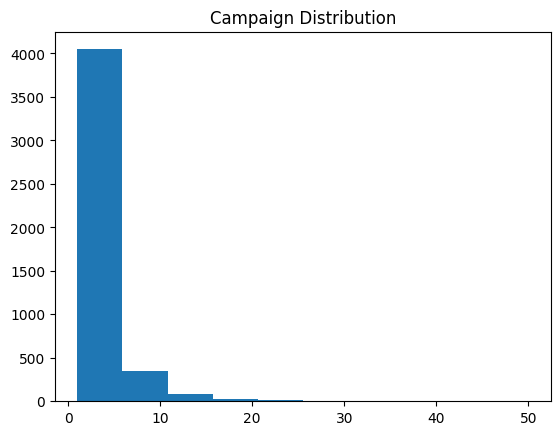

In [121]:
plt.hist(df['campaign'])
plt.title('Campaign Distribution')
plt.show()

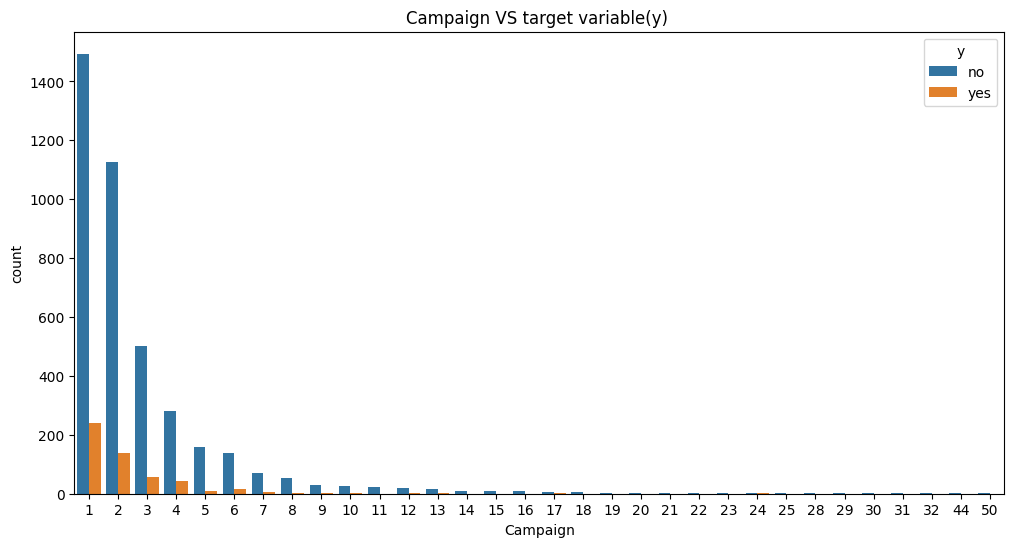

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='campaign', hue='y', data=df)
plt.title('Campaign VS target variable(y) ')
plt.xlabel('Campaign')
plt.show()

# Insights : 1,2 and 3 are most top 3 campaign numbers 

campaign
1     1734
2     1264
3      558
4      325
5      167
6      155
7       75
8       56
9       30
10      27
11      22
12      21
13      17
14      10
15       9
16       8
17       7
18       7
25       4
24       3
28       3
20       3
19       3
32       2
23       2
21       2
22       2
29       1
30       1
50       1
31       1
44       1
Name: count, dtype: int64